# Classifying Movie Reviews

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from tensorflow import keras

imdb = keras.datasets.imdb
(X_train_full, y_train_full), (X_test_full, y_test_full) = imdb.load_data(num_words = 10000)

In [3]:
X_train_full

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
y_train_full

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [5]:
[max(sequence) for sequence in X_train_full]

[7486,
 9837,
 6905,
 9941,
 7224,
 7982,
 9363,
 9820,
 7612,
 8419,
 8914,
 7412,
 9667,
 9106,
 6640,
 9671,
 9263,
 9935,
 8742,
 9580,
 9859,
 8793,
 7609,
 9462,
 9075,
 8614,
 8887,
 5898,
 9637,
 9212,
 9771,
 9209,
 8257,
 7778,
 9877,
 9753,
 7015,
 9902,
 8427,
 8867,
 8406,
 9579,
 9529,
 7056,
 7023,
 9922,
 5811,
 9124,
 9910,
 8795,
 7799,
 7146,
 9978,
 7999,
 9565,
 9731,
 9095,
 9888,
 5247,
 9655,
 4852,
 9939,
 9018,
 9885,
 7239,
 9636,
 9389,
 9561,
 9673,
 9147,
 9956,
 9448,
 8520,
 9360,
 9765,
 9025,
 9928,
 8352,
 9960,
 7320,
 8318,
 7881,
 9715,
 9851,
 9266,
 9055,
 8894,
 9719,
 9271,
 7311,
 8791,
 9918,
 9486,
 9867,
 9283,
 7707,
 9133,
 9055,
 9978,
 8013,
 8448,
 8700,
 9906,
 7517,
 9962,
 6266,
 6903,
 9815,
 9976,
 9273,
 9413,
 8931,
 8631,
 9685,
 9419,
 9964,
 7361,
 9052,
 9482,
 9643,
 9865,
 9819,
 7181,
 2775,
 9709,
 9977,
 8916,
 4431,
 9700,
 6532,
 8836,
 9926,
 6781,
 7614,
 5418,
 8881,
 9841,
 9615,
 9072,
 9831,
 6891,
 8827,
 9019,

In [6]:
max([max(sequence) for sequence in X_train_full]) 
# 바로 위에서 찾은 요소별 최대 인덱스 값 중 가장 큰 값 찾기

9999

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decode_review = ' '.join([reverse_word_index.get(i-3, '?') for i in X_train_full[0]])
# 0, 1, 2는 각각 패딩, 시작 토큰, 사전에 없음을 정의했으므로 3을 빼서 단어로 변환

In [8]:
reverse_word_index[1]

'the'

In [9]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [10]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(X_train_full)
X_test = vectorize_sequences(X_test_full)

In [11]:
print(X_train_full.shape)
print(X_train.shape)

(25000,)
(25000, 10000)


In [12]:
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [13]:
y_train_full

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [14]:
y_train = np.array(y_train_full).astype('float32')
y_test = np.array(y_test_full).astype('float32')

In [15]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (10000,)))
model.add(keras.layers.Dense(16, activation = "relu"))
model.add(keras.layers.Dense(16, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss = "binary_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [19]:
X_val = X_train[:10000]
X_train_part = X_train[10000:]
y_val = y_train[:10000]
y_train_part = y_train[10000:]

In [20]:
history = model.fit(X_train_part, y_train_part, epochs = 20, validation_data = (X_val, y_val))

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.6095 - accuracy: 0.7044 - val_loss: 0.4864 - val_accuracy: 0.8109
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3988 - accuracy: 0.8432 - val_loss: 0.3676 - val_accuracy: 0.8466
Epoch 3/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3125 - accuracy: 0.8736 - val_loss: 0.3221 - val_accuracy: 0.8652
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2687 - accuracy: 0.8937 - val_loss: 0.3112 - val_accuracy: 0.8718
Epoch 5/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2380 - accuracy: 0.9092 - val_loss: 0.2998 - val_accuracy: 0.8783
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2140 - accuracy: 0.9175 - val_loss: 0.3012 - val_accuracy: 0.8773
Epoch 7/20
469/469 [==============================] - 3s 5ms/step - loss: 0.1954 - accuracy: 0.9277 - val_loss: 0.3065 - val_accuracy: 0.8775
Epoch

Saving figure annapp_imdb_train_epoch_20


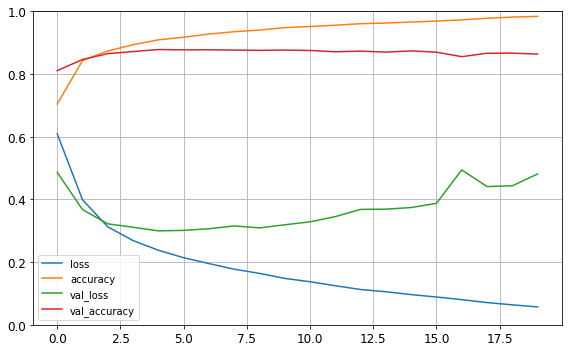

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("annapp_imdb_train_epoch_20")
plt.show()

In [22]:
test_result = model.evaluate(X_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.5050 - accuracy: 0.8555


In [23]:
test_result

[0.5050449967384338, 0.8555200099945068]

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (10000,)))
model.add(keras.layers.Dense(16, activation = "relu"))
model.add(keras.layers.Dense(16, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

history = model.fit(X_train_part, y_train_part, epochs = 5,
                   validation_data = (X_val, y_val))

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.6214 - accuracy: 0.7014 - val_loss: 0.5207 - val_accuracy: 0.7949
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.4276 - accuracy: 0.8361 - val_loss: 0.3736 - val_accuracy: 0.8480
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.3294 - accuracy: 0.8687 - val_loss: 0.3259 - val_accuracy: 0.8660
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2820 - accuracy: 0.8870 - val_loss: 0.3148 - val_accuracy: 0.8698
Epoch 5/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2498 - accuracy: 0.9027 - val_loss: 0.3350 - val_accuracy: 0.8614


Saving figure annapp_imdb_train_epoch_20


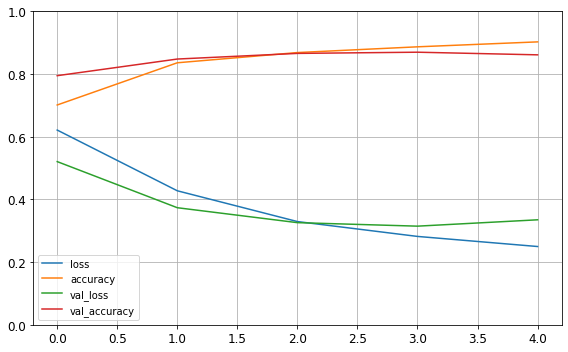

In [25]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("annapp_imdb_train_epoch_20")
plt.show()

In [26]:
test_result = model.evaluate(X_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3381 - accuracy: 0.8586


In [27]:
test_result

[0.33811330795288086, 0.8586000204086304]

# Classifying Newswires

In [28]:
from tensorflow import keras

reuters = keras.datasets.reuters
(X_train_full, y_train_full), (X_test_full, y_test_full) = reuters.load_data(num_words = 10000)

In [29]:
X_train_full

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [30]:
y_train_full

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [31]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train_full[0]])

In [32]:
reverse_word_index[1]

'the'

In [33]:
decode_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [34]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(X_train_full)
X_test = vectorize_sequences(X_test_full)

In [35]:
print(X_train_full.shape)
print(X_train.shape)

(8982,)
(8982, 10000)


In [36]:
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [37]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(y_train_full)
y_test = to_one_hot(y_test_full)

In [38]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
y_train.shape

(8982, 46)

In [40]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
y_test.shape

(2246, 46)

In [42]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (10000,)))
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dense(46, activation = "softmax"))

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                640064    
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss="categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [45]:
X_val = X_train[:1000]
X_train_part = X_train[1000:]
y_val = y_train[:1000]
y_train_part = y_train[1000:]

In [46]:
history = model.fit(X_train_part, y_train_part, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
250/250 [==============================] - 2s 8ms/step - loss: 2.7690 - accuracy: 0.3960 - val_loss: 2.0136 - val_accuracy: 0.5230
Epoch 2/30
250/250 [==============================] - 2s 7ms/step - loss: 1.8564 - accuracy: 0.5331 - val_loss: 1.7281 - val_accuracy: 0.5540
Epoch 3/30
250/250 [==============================] - 2s 7ms/step - loss: 1.6531 - accuracy: 0.6070 - val_loss: 1.5893 - val_accuracy: 0.6310
Epoch 4/30
250/250 [==============================] - 2s 8ms/step - loss: 1.5272 - accuracy: 0.6659 - val_loss: 1.4849 - val_accuracy: 0.6740
Epoch 5/30
250/250 [==============================] - 2s 8ms/step - loss: 1.4203 - accuracy: 0.6933 - val_loss: 1.4016 - val_accuracy: 0.6840
Epoch 6/30
250/250 [==============================] - 2s 8ms/step - loss: 1.3274 - accuracy: 0.7057 - val_loss: 1.3265 - val_accuracy: 0.6990
Epoch 7/30
250/250 [==============================] - 2s 8ms/step - loss: 1.2467 - accuracy: 0.7166 - val_loss: 1.2763 - val_accuracy: 0.7080
Epoch 

In [47]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

Saving figure annapp_reuters_train_epoch_30


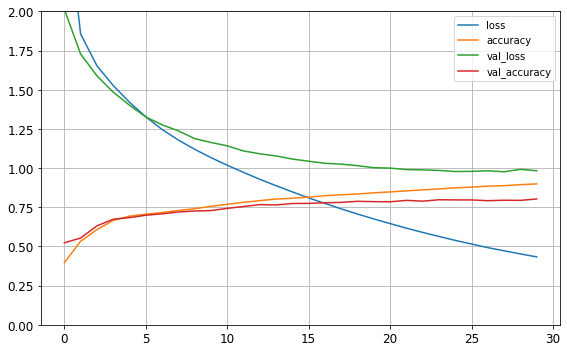

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
save_fig("annapp_reuters_train_epoch_30")
plt.show()

In [49]:
test_result = model.evaluate(X_test, y_test)

71/71 [==============================] - 1s 4ms/step - loss: 1.0444 - accuracy: 0.7698


In [50]:
test_result

[1.0444198846817017, 0.7698130011558533]

# Predicting House Prices

In [51]:
from tensorflow import keras

housing = keras.datasets.boston_housing
(X_train_full, y_train_full), (X_test_full, y_test_full) = housing.load_data()

In [52]:
y_train_full

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [53]:
X_train = np.copy(X_train_full)
mean = X_train.mean(axis = 0)
X_train -= mean
std = X_train.std(axis = 0)
X_train /= std

X_test = np.copy(X_test_full)
X_test -= mean
X_test /= std

In [54]:
X_train

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [55]:
X_test

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

In [56]:
y_train = y_train_full
y_test = y_test_full

In [57]:
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = (X_train.shape[1],)))
    model.add(keras.layers.Dense(64, activation = "relu"))
    model.add(keras.layers.Dense(64, activation = "relu"))
    model.add(keras.layers.Dense(1))

    model.compile(loss = "mse", optimizer = "rmsprop", metrics = ["mae"])
    
    return model

In [58]:
model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 13)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                896       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [59]:
k = 4
num_val = len(X_train) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    
    X_val = X_train[i * num_val: (i + 1) * num_val]
    y_val = y_train[i * num_val: (i + 1) * num_val]
    X_train_part = np.concatenate([X_train[:i * num_val], X_train[(i + 1) * num_val:]], axis = 0)
    y_train_part = np.concatenate([y_train[:i * num_val], y_train[(i + 1) * num_val:]], axis = 0)
    
    model = build_model()
    model.fit(X_train_part, y_train_part, epochs = num_epochs, verbose = 0)
    val_mse, val_mae = model.evaluate(X_val, y_val, verbose = 0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [60]:
all_scores

[2.105074644088745, 2.3849408626556396, 2.406405210494995, 2.5600180625915527]

In [61]:
np.mean(all_scores)

2.364109694957733

In [62]:
k = 4
num_val = len(X_train) // k
num_epochs = 200
all_mae_histories = []

for i in range(k):
    print('processing folkd #', i)
    
    X_val = X_train[i * num_val: (i + 1) * num_val]
    y_val = y_train[i * num_val: (i + 1) * num_val]
    X_train_part = np.concatenate([X_train[:i * num_val], X_train[(i + 1) * num_val:]], axis = 0)
    y_train_part = np.concatenate([y_train[:i * num_val], y_train[(i + 1) * num_val:]], axis = 0)
    
    model = build_model()
    
    history = model.fit(X_train_part, y_train_part, validation_data = (X_val, y_val),
                       epochs = num_epochs, verbose = 0)
    
    mae_history = history.history['val_mae']
    
    all_mae_histories.append(mae_history)

processing folkd # 0
processing folkd # 1
processing folkd # 2
processing folkd # 3


In [63]:
all_mae_histories

[[19.690902709960938,
  17.937530517578125,
  16.053346633911133,
  13.993847846984863,
  11.661245346069336,
  9.305525779724121,
  7.2812018394470215,
  5.832551002502441,
  4.915071487426758,
  4.285522937774658,
  3.8001677989959717,
  3.5062546730041504,
  3.299548864364624,
  3.1744651794433594,
  3.0213897228240967,
  2.9793472290039062,
  2.897491455078125,
  2.7908921241760254,
  2.8226101398468018,
  2.7518646717071533,
  2.6472978591918945,
  2.613694667816162,
  2.585508346557617,
  2.572091817855835,
  2.568157196044922,
  2.453096866607666,
  2.4646360874176025,
  2.403071641921997,
  2.3677568435668945,
  2.437549114227295,
  2.4406116008758545,
  2.3419713973999023,
  2.3277230262756348,
  2.267910957336426,
  2.342618942260742,
  2.2068138122558594,
  2.166447162628174,
  2.204927444458008,
  2.177760601043701,
  2.197747230529785,
  2.1989827156066895,
  2.100327253341675,
  2.1729416847229004,
  2.101628303527832,
  2.082266092300415,
  2.08707594871521,
  2.05338644

In [64]:
ave_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Saving figure annapp_housing_val_epoch_200


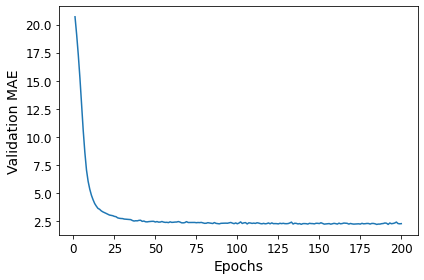

In [65]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(ave_mae_history) + 1), ave_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
# plt.gca().set_ylim(2, 3)
save_fig("annapp_housing_val_epoch_200")
plt.show()

In [66]:
model = build_model()
model.fit(X_train, y_train, epochs = 100, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 16.8665 - mae: 2.7695


In [67]:
test_mae_score

2.769517421722412

Saving figure annapp_housing_val_epoch_200


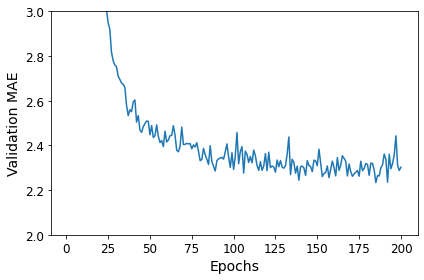

In [68]:
plt.plot(range(1, len(ave_mae_history) + 1), ave_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.gca().set_ylim(2, 3)
save_fig("annapp_housing_val_epoch_200")
plt.show()